In [1]:
import numpy as np
import xarray as xr

In [2]:
dt = 0.01 #timestep in years
tlength = 100 # total length of time in years
nt = tlength / dt # number of timesteps

## make a time axis as an xarray dataarray
time = xr.DataArray(np.arange(nt) * dt, dims=['time (years)'],coords=[np.arange(nt) * dt])

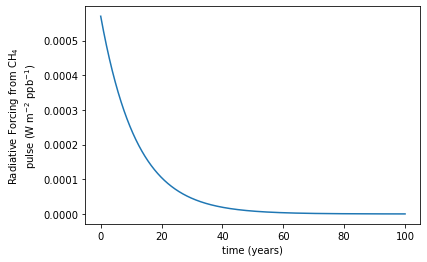

In [3]:
## Methane properties from table 7.15 of IPC AR6

ch4_lifetime = 11.8 # years
ch4_radefficiency = 5.7e-4 # W m-2 ppb-1
ch4_molarmass = 16.04

CH4_rad = ch4_radefficiency * np.exp(-time/ch4_lifetime)

CH4_rad.name = 'Radiative Forcing from CH$_4$ pulse (W m$^{-2}$ ppb$^{-1}$)'
CH4_rad.plot()

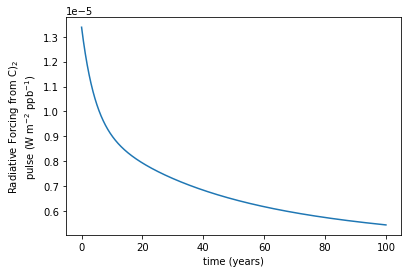

In [4]:
### CO2 impulse response functions from Joos et al. https://acp.copernicus.org/articles/13/2793/2013/acp-13-2793-2013.pdf
### uses Equation 11 and constants from Table 2

a0 = 0.2173
a1 = 0.2240
a2 = 0.2824
a3 = 0.2824
tau1 = 394.4
tau2 = 36.54
tau3 = 4.304
IRF = a0 + a1*np.exp(-time/tau1) + a2*np.exp(-time/tau2) + a3*np.exp(-time/tau3)

CO2_radefficiency = 1.33e-5
co2_rad = IRF * CO2_radefficiency

co2_rad.name = 'Radiative Forcing from C)$_2$ pulse (W m$^{-2}$ ppb$^{-1}$)'
co2_rad.plot()

co2_molarmass= 44.01

#IRF.plot()

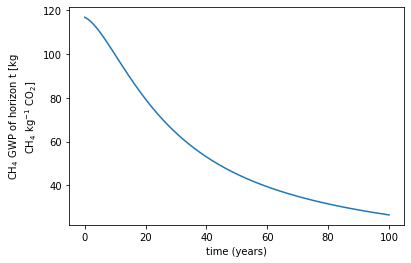

In [5]:
GWPx = (CH4_rad.cumsum() / co2_rad.cumsum()) * co2_molarmass/ch4_molarmass
GWPx.name = 'CH$_4$ GWP of horizon t [kg CH$_4$ kg$^{-1}$ CO$_{2}$]'
GWPx.plot()

In [6]:
### claculate GWP at some fixed time

delta_t = 20.
ntsteps = int(delta_t / dt)

GWP_molar = CH4_rad.cumsum()[ntsteps] / co2_rad.cumsum()[ntsteps]
GWP = GWP_molar * co2_molarmass/ch4_molarmass
print(GWP.data)

79.39933005786264
